In [1]:
# This Section (Spanning two weeks) Will cover neural networks.
# This is the final math step in putting together all of the stuff we have learned about linear
# Regression, math, and python. After this, we can start doing more intelligent ML.

In [2]:
# Below, we generate the Xor dataset
import numpy as np

n_data = 1000
x = np.random.randint(2, size=(n_data, 2))
y = x[:,0] != x[:,1]

In [3]:
from sklearn.linear_model import Ridge

In [4]:
# Let's train liear regression to predict the y values

In [5]:
mdl = Ridge().fit(x, y)

mdl.coef_

array([-0.03652672, -0.03068175])

In [6]:
# And let's check the accuracy

In [7]:
yhat = mdl.predict(x) > 0.5

In [8]:
(yhat == y).mean()

0.769

In [9]:
# What the heck! Why is our accuracy 50%? That's not very good. Let's look below at the problem we're
# Solving. How could we solve that? Should x1 and x2 have positive or negative coeficients? 
# There isn't really an answer, so the model just sets them to close to 0.

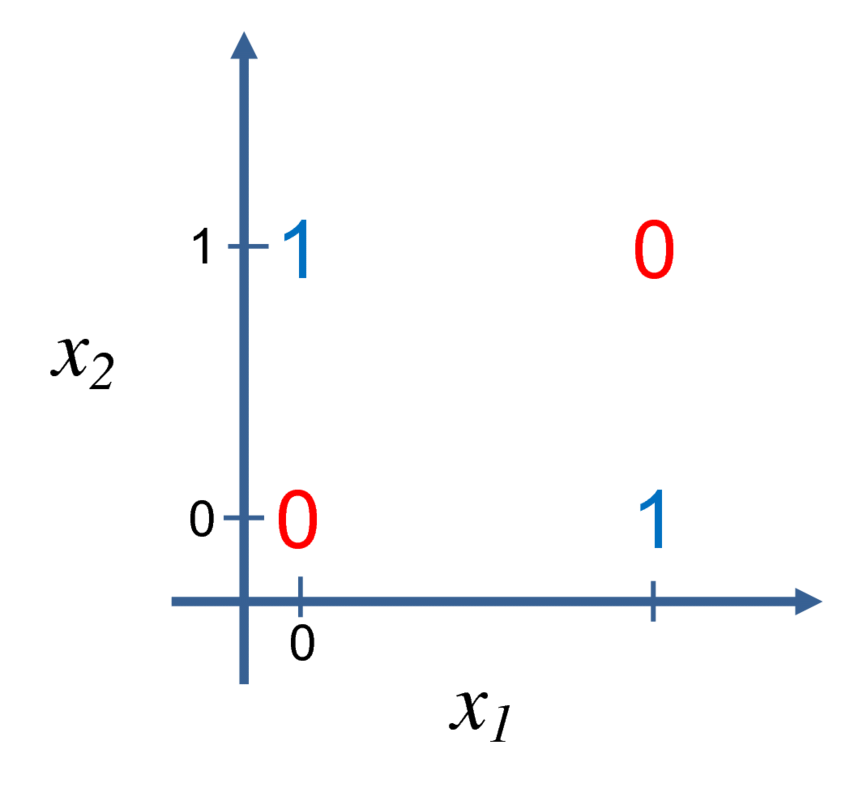

In [10]:
from IPython.display import Image
Image(filename='xor.png', width=200, height=200) 

In [11]:
# What if you had features 
# x1, x2, x3=(x1 OR x2) 
# (essentially, x3 is only equal to one at the top right corner of the above image)?
# Would you be able to learn linear regression to solve this problem? 
# What you you assign the weights to be?

In [12]:
# Solution:
# x1: 1, x2: 1, x3: -2

In [13]:
x3 = x.sum(1, keepdims = True) == 2

In [14]:
x_expanded = np.concatenate((x, x3), 1)

In [15]:
mdl_improved = Ridge().fit(x_expanded, y)
mdl_improved.coef_

array([ 0.9714859 ,  0.97162296, -1.95257718])

In [16]:
# Oh! Check it out, the model learned exactly what we wanted it to learn! (Well, almost)
# What if we reduced our regularization, do we think the model would get closer to [1, 1, -2],
# Or further away?

In [17]:
mdl_improved = Ridge(0).fit(x_expanded, y)
mdl_improved.coef_

array([ 1.,  1., -2.])

In [18]:
# Wow! It's perfect! Great.
# So the problem here is, we already knew to compute x3, that new feature
# Before we improved our model.
# Let's do a few things with our original x, y dataset

In [19]:
# First, let's check if other models could solve this problem.
# Let's try a decision tree, and a neural network.

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
dt = DecisionTreeRegressor().fit(x, y)
yhat_dt = dt.predict(x)
(yhat_dt == y).mean()

1.0

In [22]:
from sklearn.neural_network import MLPRegressor


In [23]:
nn = MLPRegressor((100, 100)).fit(x, y)
yhat_nn = nn.predict(x) > .5
(yhat_nn == y).mean()

1.0

In [24]:
# Okay, so we know that it's possible for a model to automatically learn stuff like our 
# "x_expanded" from earlier, that they can use to solve x_or
# So let's try to implement a model like linear regression, but with this quirk.
# Let's try a bunch of linear regressions each computing their own features
# Let's call teh number of linear regressions we do in this first layer num_hidden,
# Because we call this the hidden layer of our neural network.
# We can treat these
# Three like features from a fake dataset, and use them to do linear regression to predict y.

In [25]:
num_hidden = 100

In [26]:
first_lr = np.random.rand(2, num_hidden)

In [27]:
second_lr = np.random.rand(num_hidden)

In [28]:
# So here's the issue. If we do this directly, it will mathematically represent the same thing
# As a single linear regression from x prediction y.
# Here are some links that describe the issue. I won't go into it in detail
# https://math.stackexchange.com/questions/1948502/show-that-multiplication-of-matrices-corresponds-to-composition-of-linear-transf
# http://www.math.lsa.umich.edu/~kesmith/217worksheet2-3ALT1.pdf
# Let me propose a specific trick to get around this though. All we need is to not compose linear 
# Functions. So how about we look at the features we computed with the first step, let's put them
# Through this kink function (called a leaky relu), that is NOT LINEAR.
# Now we're good to go

In [29]:
def leaky_relu(x):
    return (x>0) * x + (x< 0) * x * .1

In [30]:
xviz = np.linspace(-10, 10, 1000)

In [31]:
yviz = leaky_relu(xviz)

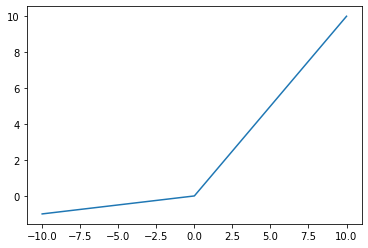

In [32]:
import matplotlib.pyplot as plt
plt.plot(xviz, yviz)

In [33]:
# Great! So now let's build it.
features = x.dot(first_lr)

In [34]:
features.shape

(1000, 100)

In [35]:
yhat = features.dot(second_lr)

In [36]:
loss = (yhat - y) **2
dl_dyhat = y - yhat

In [37]:
dl_dyhat.shape

(1000,)

In [38]:
second_lr.shape

(100,)

In [39]:
dl_dsecond_lr = dl_dyhat.dot(features)
dl_dfeatures = np.matmul(dl_dyhat[:,None], second_lr[None,:])

In [40]:
dl_dfeatures.shape

(1000, 100)

In [41]:
# check the features of each of our derivitives! For instance, dl_dfeatures is the same shape 
# as features. This makes sense, because the derivitive tells us which direction it wants us to change
# Each of the values

In [42]:
x.shape

(1000, 2)

In [43]:
dl_dfeatures.shape

(1000, 100)

In [44]:
dl_dfirst_lr = x.T.dot(dl_dfeatures)

In [45]:
# Okay! We calculated all our derivitives. Let's put this in a for loop to update our parameters

In [46]:
np.random.seed(0)
lr = .0001
first_lr = np.random.rand(2, num_hidden)/10000
second_lr = np.random.rand(num_hidden)/10000
for update_step in range(100):
    features = x.dot(first_lr)
    yhat = features.dot(second_lr)
    loss = sum((yhat - y) **2)
    dl_dyhat = y - yhat
    dl_dsecond_lr = dl_dyhat.dot(features)
    dl_dfeatures = np.matmul(dl_dyhat[:,None], second_lr[None,:])
    dl_dfirst_lr = x.T.dot(dl_dfeatures)
    first_lr = first_lr + lr * dl_dfirst_lr
    second_lr = second_lr + lr * dl_dsecond_lr
    if update_step % 10 == 0:
        print(update_step, 'loss', loss)
        print(update_step, 'acc', ((yhat > 0.5) == y).mean())

0 loss 504.9997491806817
0 acc 0.495
10 loss 504.9994326655365
10 acc 0.495
20 loss 504.99882589232226
20 acc 0.495
30 loss 504.99761721494673
30 acc 0.495
40 loss 504.9951864572196
40 acc 0.495
50 loss 504.9902867528474
50 acc 0.495
60 loss 504.98040520875276
60 acc 0.495
70 loss 504.96047514957473
70 acc 0.495
80 loss 504.9202823902344
80 acc 0.495
90 loss 504.83924739314676
90 acc 0.495


In [47]:
# Okay, so we were able to train the model and reduce the loss, but we still didn't
# learn accuracy greater than half.
# So let's do that thing we talked about earlier, and put the leaky relu in for our "hidden features"
# (the one's after the first linear regression)

In [48]:

lr = .00001
first_lr = np.random.rand(2, num_hidden)/10000
second_lr = np.random.rand(num_hidden)/10000
for update_step in range(100):
    features = x.dot(first_lr)
    features = features > 0 + (features < 0) * .1
    yhat = features.dot(second_lr)
    loss = sum((yhat - y) **2)
    dl_dyhat = y - yhat
    dl_dsecond_lr = dl_dyhat.dot(features)
    dl_dfeatures = np.matmul(dl_dyhat[:,None], second_lr[None,:])
    dl_dfeatures = dl_dfeatures * ((features > 0) + (features <= 0) * .1)
    dl_dfirst_lr = x.T.dot(dl_dfeatures)
    first_lr = first_lr + lr * dl_dfirst_lr
    second_lr = second_lr + lr * dl_dsecond_lr
    if update_step % 10 == 0:
        print(update_step, 'loss', loss)
        print(update_step, 'acc', ((yhat > 0.5) == y).mean())

0 loss 499.9067990010829
0 acc 0.495
10 loss 202.41668325759971
10 acc 0.736
20 loss 91.09898542856757
20 acc 1.0
30 loss 28.408951388378316
30 acc 1.0
40 loss 11.630455533755187
40 acc 1.0
50 loss 5.851627029605045
50 acc 1.0
60 loss 2.381246176246608
60 acc 1.0
70 loss 0.04595059700045355
70 acc 1.0
80 loss 0.016764386798230946
80 acc 1.0
90 loss 0.013079879828295112
90 acc 1.0


In [49]:
# WOOO! We got 100% accuracy! That's called a neurel network.
# We can also insert more hidden layers. Each hidden layer's job is just to compute teh next
# Hidden layer, before finally the last one is used to perform the final linear regression